# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

# Show data information

In [29]:
dec_2021_flights = pd.read_csv('december_2021_flights.csv')
print(dec_2021_flights.head())
print(dec_2021_flights.describe())
print(dec_2021_flights.info())
print(dec_2021_flights.nunique())

   YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK                FL_DATE  \
0  2021     12             7            2  12/7/2021 12:00:00 AM   
1  2021     12             7            2  12/7/2021 12:00:00 AM   
2  2021     12             7            2  12/7/2021 12:00:00 AM   
3  2021     12             7            2  12/7/2021 12:00:00 AM   
4  2021     12             7            2  12/7/2021 12:00:00 AM   

  OP_UNIQUE_CARRIER ORIGIN DEST  CRS_DEP_TIME  DEP_TIME  DEP_DELAY_NEW  \
0                WN    DEN  MDW           650     650.0            0.0   
1                WN    DEN  MDW          1520    1613.0           53.0   
2                WN    DEN  MEM          1330    1429.0           59.0   
3                WN    DEN  MIA          1800    1901.0           61.0   
4                WN    DEN  MIA          1045    1120.0           35.0   

   DEP_DEL15  CRS_ARR_TIME  ARR_TIME  ARR_DELAY_NEW  ARR_DEL15  \
0        0.0          1010     956.0            0.0        0.0   
1        1.0  

# Clean and alter data

In [30]:
dec_2021_flights = dec_2021_flights.drop([
    'YEAR',
    'MONTH',
    'FL_DATE',
    'DEP_TIME',
    "ARR_TIME",
    'DISTANCE', 
    'DEP_DELAY_NEW',
    'ARR_DELAY_NEW', 
    'CRS_ELAPSED_TIME',
    'CRS_ARR_TIME',
    'ARR_DEL15',
], axis=1)
dec_2021_flights['DISTANCE_GROUP'] = dec_2021_flights['DISTANCE_GROUP'].map({
    1:"0-249",
    2:"250-499",
    3:"500-749",
    4:"750-999",
    5: "1000-1249",
    6: "1250-1499",
    7: "1500-1749",
    8: "1750-1999",
    9: "2000-1249",
    10: "1250-1499",
    11: "1500-1749"
})

dec_2021_flights['DAY_OF_WEEK'] = dec_2021_flights['DAY_OF_WEEK'].map({
    1:"Sunday",
    2:"Monday",
    3:"Tuesday",
    4:"Wednesday",
    5:"Thursday",
    6:"Friday",
    7:"Saturday"
})

dec_2021_flights = dec_2021_flights.rename(columns={
    "OP_UNIQUE_CARRIER":"AIRLINE",
    "CRS_DEP_TIME":"DEPARTURE",
    "DEP_DEL15":"DEPARTURE_DELAY",
})

print(dec_2021_flights.head())




   DAY_OF_MONTH DAY_OF_WEEK AIRLINE ORIGIN DEST  DEPARTURE  DEPARTURE_DELAY  \
0             7      Monday      WN    DEN  MDW        650              0.0   
1             7      Monday      WN    DEN  MDW       1520              1.0   
2             7      Monday      WN    DEN  MEM       1330              1.0   
3             7      Monday      WN    DEN  MIA       1800              1.0   
4             7      Monday      WN    DEN  MIA       1045              1.0   

  DISTANCE_GROUP  
0        750-999  
1        750-999  
2        750-999  
3      1500-1749  
4      1500-1749  


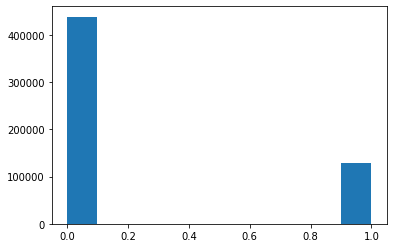

In [40]:
plt.hist(dec_2021_flights['DEPARTURE_DELAY'])
plt.show()

# Train / Test split

In [31]:
delays = dec_2021_flights['DEPARTURE_DELAY'].to_numpy().astype(int)

features = dec_2021_flights.drop(["DEPARTURE_DELAY"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, delays, test_size=0.3, random_state=42, stratify=delays)

[0 1 1 ... 0 0 0]


# Preprocess the data

In [33]:
# Convert the categorical features in the train and test sets independently
# this improves computation time. There are also some models that require strictly numeric format
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# we need to reindex the columns in case features appeared in the test set that were not in the train set
# set the fill value to 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaled_X_train = scaler.fit_transform(X_train)
rescaled_X_test = scaler.transform(X_test)

# Train Logistic Regression Model

In [37]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(max_iter=1000)
# fit the model
logreg.fit(rescaled_X_train, y_train)

LogisticRegression(max_iter=1000)

# Model Accuracy

In [38]:
y_pred_train = logreg.predict(rescaled_X_train)
y_pred_test = logreg.predict(rescaled_X_test)

print("Accuracy of logistic regression classifier: ",accuracy_score(y_train, y_pred_train))

Accuracy of logistic regression classifier:  0.7676861184835757
